<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Gravity-n_body-problems" data-toc-modified-id="Gravity-n_body-problems-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Gravity n_body problems</a></span></li><li><span><a href="#Charged-Particle-n_body-problem" data-toc-modified-id="Charged-Particle-n_body-problem-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Charged Particle n_body problem</a></span></li></ul></li><li><span><a href="#3D-animation" data-toc-modified-id="3D-animation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3D animation</a></span><ul class="toc-item"><li><span><a href="#Gravity-n-body" data-toc-modified-id="Gravity-n-body-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gravity n-body</a></span></li><li><span><a href="#Charged-n-body" data-toc-modified-id="Charged-n-body-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Charged n-body</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import time

from ODEAnalysis import *
from n_Body_Simulation import *
from n_body_equations import *

from functools import partial

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook 

In [2]:
# GoodOnes G=1
# 1D
# [5,-5,1,-1.5], m = [200,1]

# 2D
# [[0,0],[10,0],[0,0],[0,20]], m = [200,4]
# [[0,0],[10,0],[-5,0],[0,0],[0,20],[0,-4]], m = [200,4, 1]

## Gravity n_body problems

We have the Hamiltonian,
> \begin{align*}
H = \sum_{i=1}^n \frac{||p_i||^2}{2m_i}  -  \sum_{(i,j)=(1,1)}^{(n,n)} \zeta_{ij}\frac{Gm_im_j}{||q_i-q_j||}
\end{align*}

Where $G$ is gravitational constant, with
>$$
\zeta_{ij} =
\begin{cases}
1, i>j\\
0, i\leq j
\end{cases}
$$

This leads to a system of ODE,

> \begin{align*}
\dot{q}_i &= \frac{p_i}{m_i}\\
\dot{p}_i &= -\sum_{j\in S_i}\frac{Gm_im_j}{||q_i-q_j||^3}(q_i-q_j)
\end{align*}

Where $S_i = \{1,2,...,n\}/\{i\}$

<IPython.core.display.Javascript object>


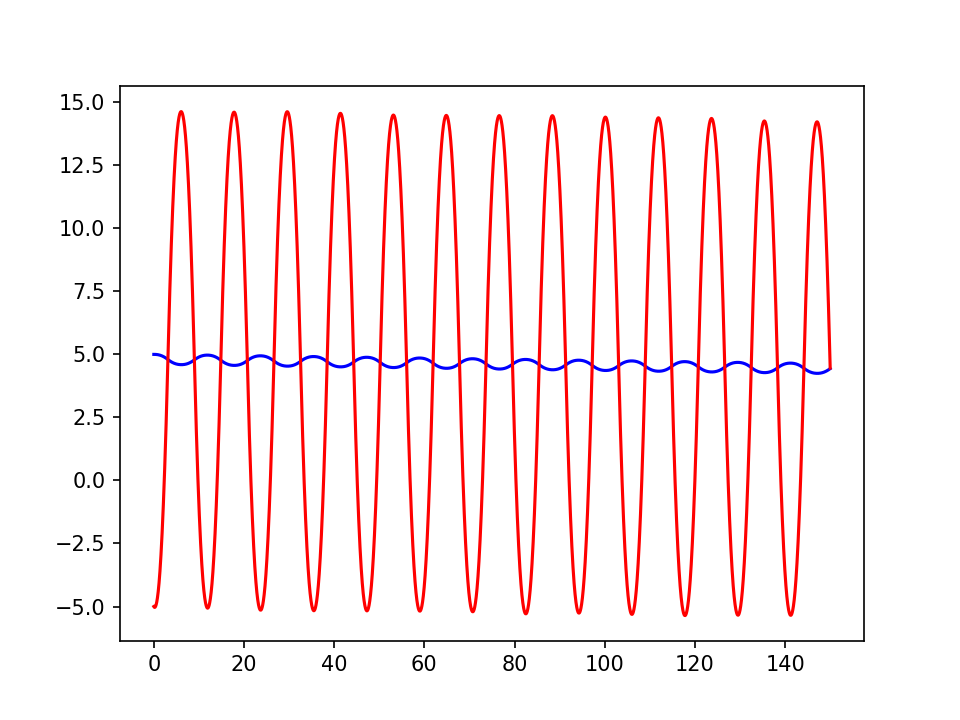

In [5]:
def body_2(t, q1, q2, p1, p2):
    #We have q1,q2,p1,p2 are numpy arrays(vectors) 
    m1 = 200
    m2 = 4
    G = 1
    
    dot_q1 = p1/m1 
    dot_q2 = p2/m2
    dot_p1 = -G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    dot_p2 = G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    
    if np.linalg.norm((dot_p1)) > 10:
        dot_p1 = 10*(dot_p1/np.linalg.norm(dot_p1))
        
        
    if np.linalg.norm(dot_p2) > 10:
        dot_p2 = 10*(dot_p2/np.linalg.norm(dot_p2))
 

    
    return np.array([dot_q1,dot_q2,dot_p1,dot_p2])
    
    
ODE = ODEAnalysis(body_2)    
a = ODE.RungeKutta(150,0,[[5],[-5],[1],[-1.5]])

plt.plot(a[0], a[1][:,0], color = 'Blue')
plt.plot(a[0], a[1][:,1], color = 'Red')
plt.show()

<IPython.core.display.Javascript object>


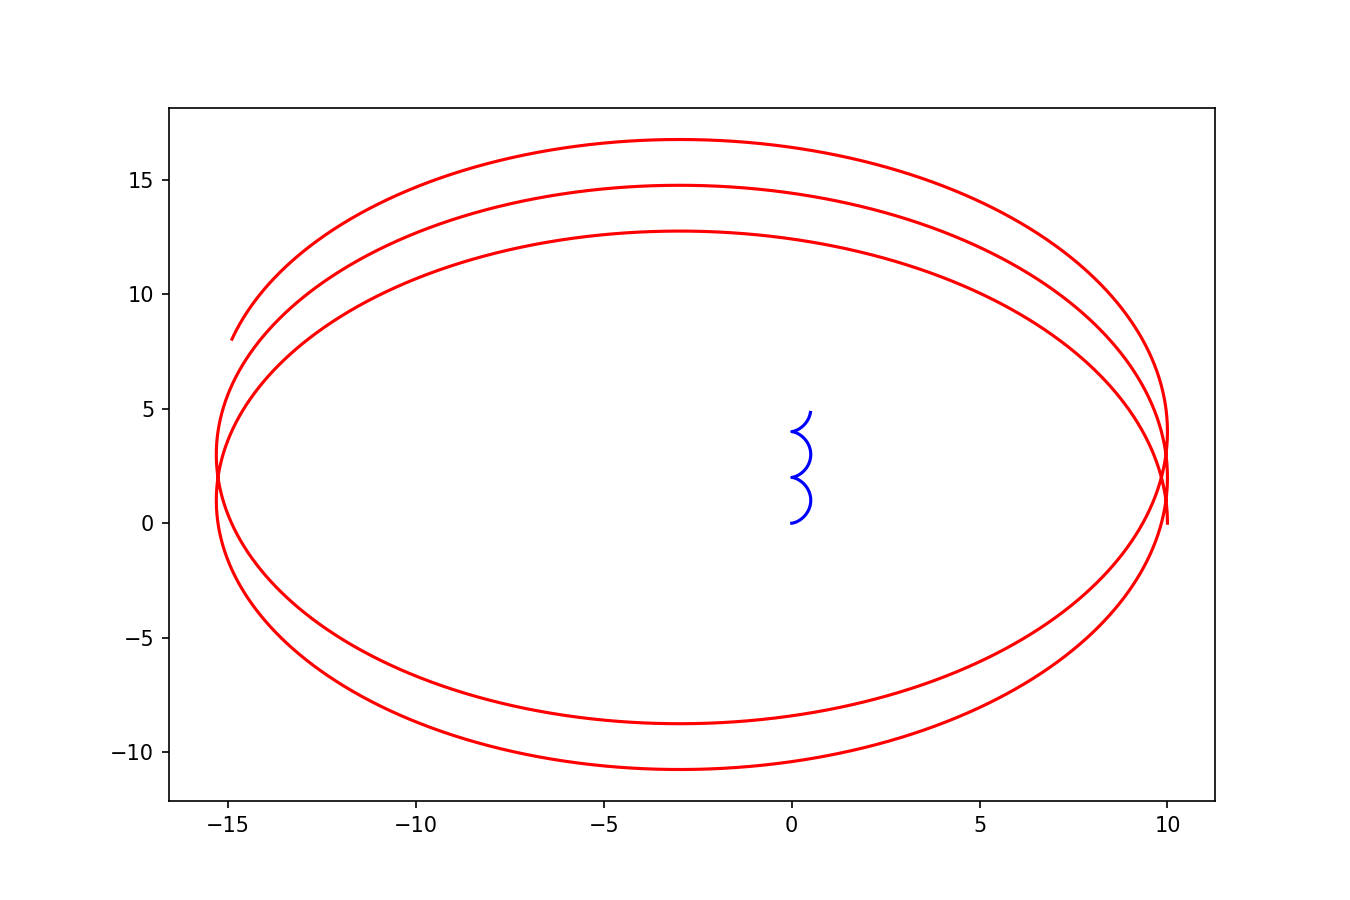

In [7]:
ODE = ODEAnalysis(body_2)    
t, x = ODE.RungeKutta(50,0,[[0,0],[10,0],[0,0],[0,20]])

plt.figure(figsize=(9, 6))
plt.plot(x[:,0,0],x[:,0,1], color = "Blue")
plt.plot(x[:,1,0],x[:,1,1], color = "Red")
plt.show()

<IPython.core.display.Javascript object>


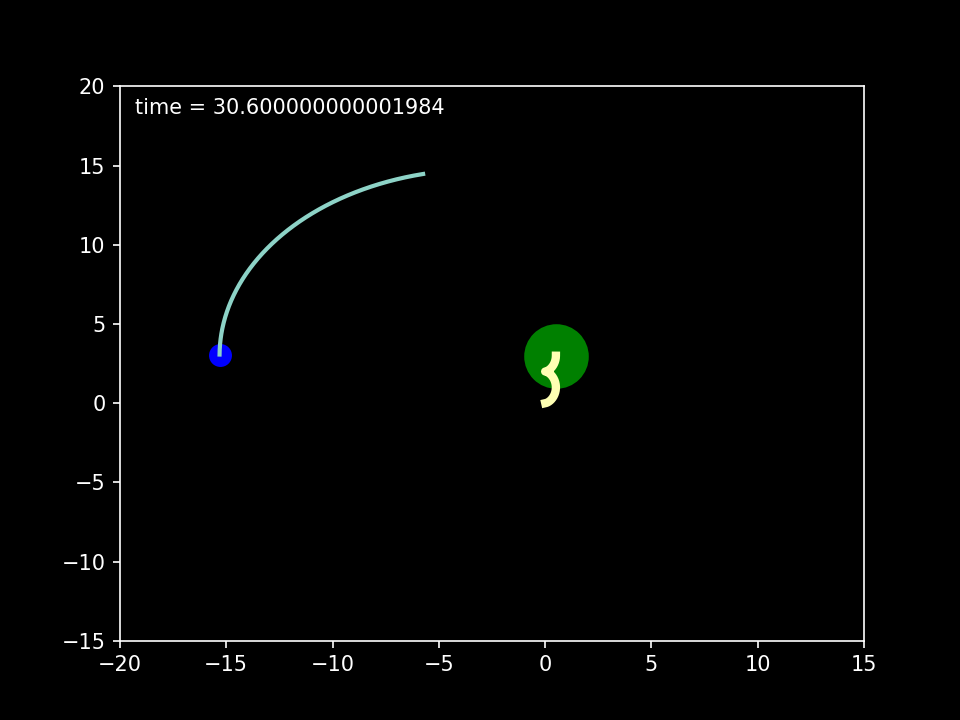

In [8]:
plt.style.use('dark_background')


Earth_x = x[:,0,0]
Earth_y = x[:,0,1]
Moon_x = x[:,1,0]
Moon_y = x[:,1,1]
time = t

Speed = 10
num_of_frames = (len(x[:,0,0])-1)//Speed

fig = plt.figure()
ax = plt.axes(xlim=(-20, 15), ylim=(-15, 20))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
Earth, = ax.plot([], [],'bo', ms = 30, color = 'Green')
Moon, = ax.plot([], [], 'bo', ms = 10)

Moon_Track, = ax.plot([],[], lw = 2)
Earth_Track, = ax.plot([],[], lw = 4)

def init():
    Earth.set_data([],[])
    Moon.set_data([],[])
    Earth_Track.set_data([],[])
    Moon_Track.set_data([],[])
    
    time_text.set_text('')
    return Earth, Moon, Earth_Track, Moon_Track

def animate(i):
    # i represents the frame number
    pos = i*Speed
    E_trace_len = 3000
    M_trace_len = 500
    
    Earth.set_data(Earth_x[pos], Earth_y[pos])
    Moon.set_data(Moon_x[pos], Moon_y[pos])
    
    Earth_Track.set_data(Earth_x[max(0,pos-E_trace_len):pos], Earth_y[max(0,pos-E_trace_len):pos])
    Moon_Track.set_data(Moon_x[max(0,pos-M_trace_len):pos], Moon_y[max(0,pos-M_trace_len):pos])
    
    time_text.set_text('time = '+str(time[pos]))
    return Earth, Moon, Earth_Track, Moon_Track

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_of_frames, interval=40, blit=True, save_count=1500)

#This line takes forever


<IPython.core.display.Javascript object>


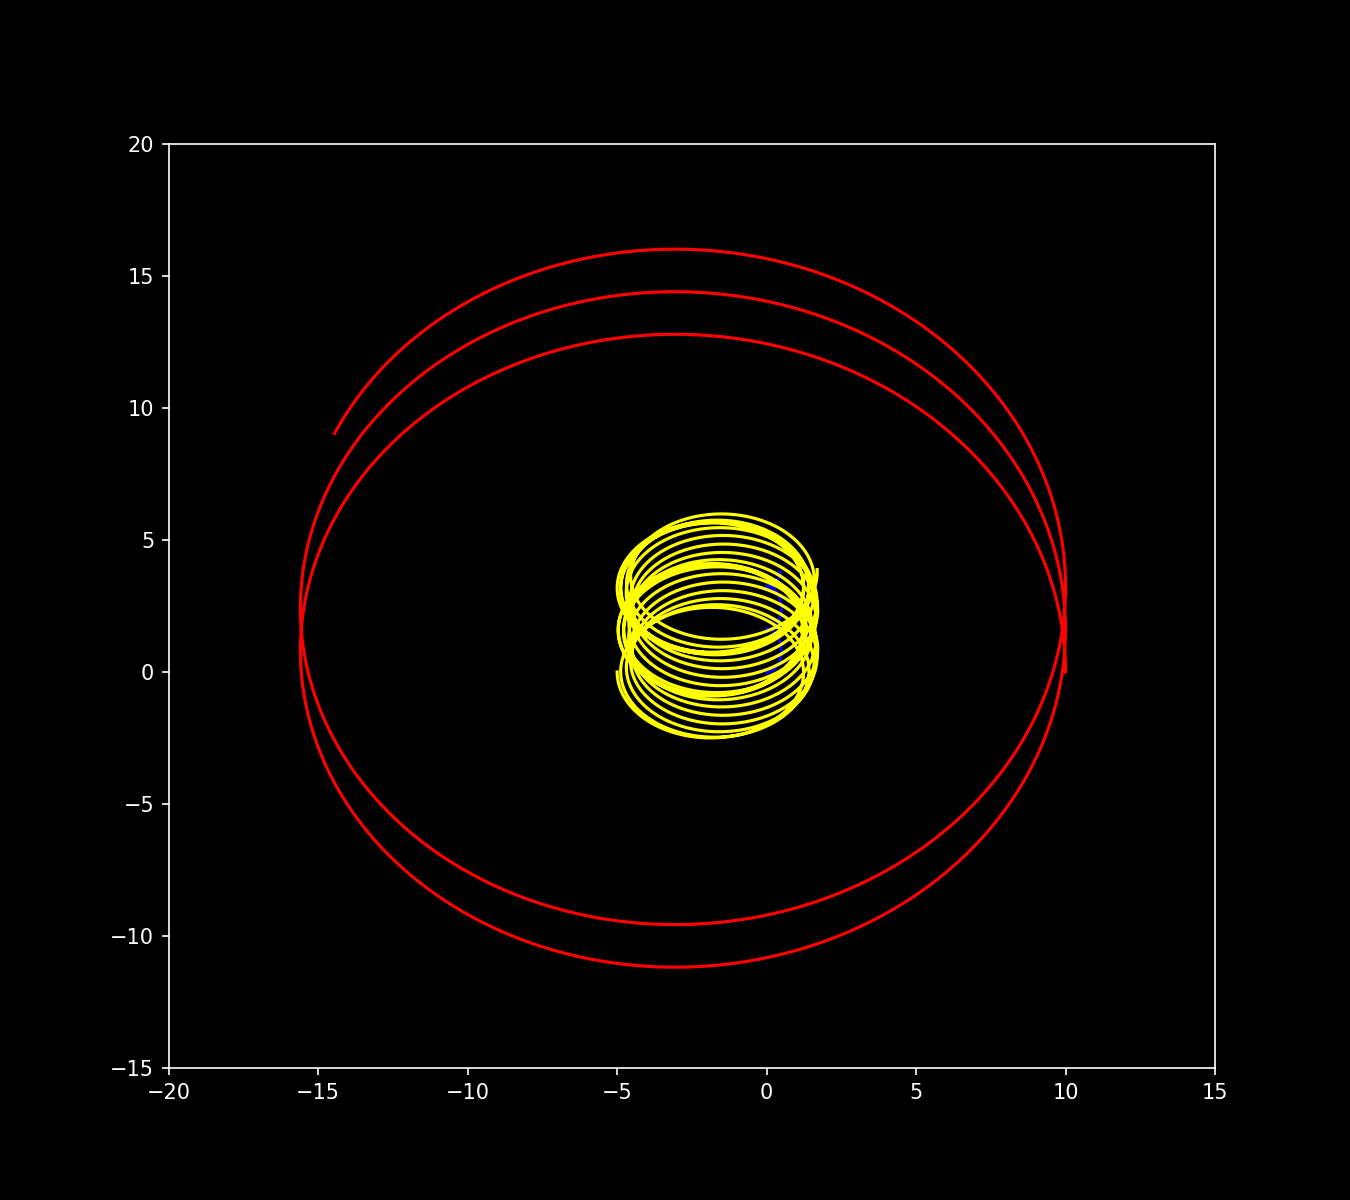

In [10]:
my_class = Grav_N_Body([])
my_class.mass = [200,4,1]
ODE = ODEAnalysis(my_class.n_body_system)    
t, x = ODE.RungeKutta(50,0,[[0,0],[10,0],[-5,0],[0,0],[0,20],[0,-4]])
plt.figure(figsize=(9, 8))
plt.axes(xlim=(-20, 15), ylim=(-15, 20))
plt.plot(x[:,0,0],x[:,0,1], color = "Blue")
plt.plot(x[:,1,0],x[:,1,1], color = "Red")
plt.plot(x[:,2,0],x[:,2,1], color = "Yellow")
plt.show()

<IPython.core.display.Javascript object>


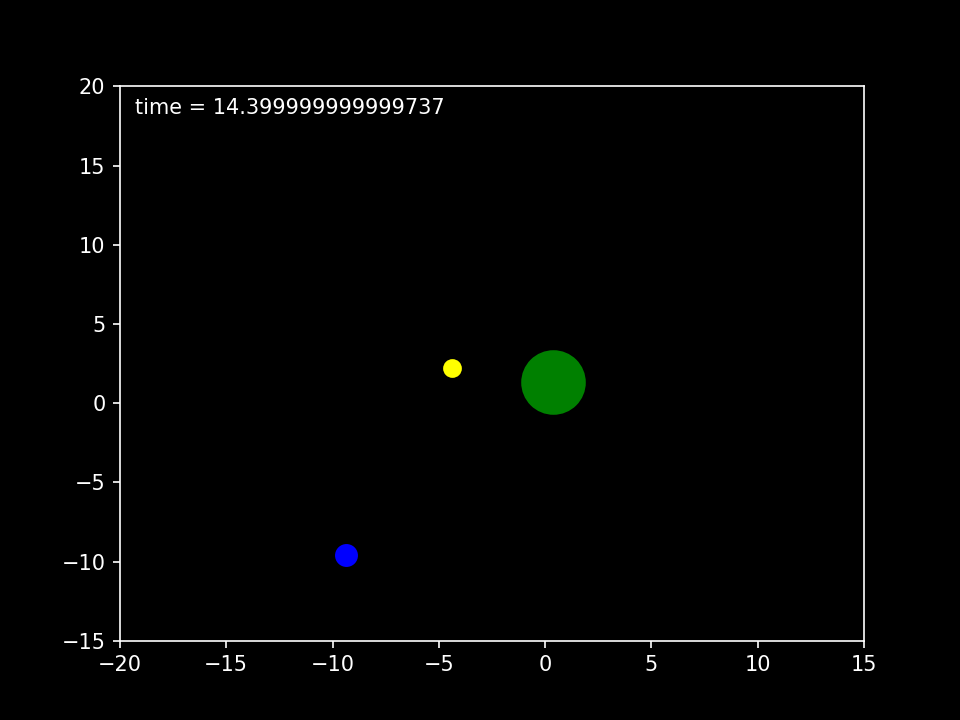

In [11]:
Earth_x = x[:,0,0]
Earth_y = x[:,0,1]
Moon_x = x[:,1,0]
Moon_y = x[:,1,1]
UFO_x = x[:,2,0]
UFO_y = x[:,2,1]
time = t

Speed = 10
num_of_frames = (len(x[:,0,0])-1)//Speed
plt.style.use('dark_background')


fig = plt.figure()
ax = plt.axes(xlim=(-20, 15), ylim=(-15, 20))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
Earth, = ax.plot([], [],'bo', ms = 30, color = 'Green')
Moon, = ax.plot([], [], 'bo', ms = 10)
UFO, = ax.plot([], [], 'bo', ms = 8, color = "Yellow")

#Moon_Track, = ax.plot([],[], lw = 2)
#Earth_Track, = ax.plot([],[], lw = 4)
#UFO_Track, = ax.plot([],[], lw = 1.5)

def init():
    Earth.set_data([],[])
    Moon.set_data([],[])
    UFO.set_data([],[])
    
    #Earth_Track.set_data([],[])
   # Moon_Track.set_data([],[])
    #UFO_Track.set_data([],[])
    
    time_text.set_text('')
    return Earth, Moon, UFO#, Earth_Track, Moon_Track, UFO_Track

def animate(i):
    # i represents the frame number
    pos = i*Speed
    E_trace_len = 3000
    M_trace_len = 500
    U_trace_len = 100
    
    Earth.set_data(Earth_x[pos], Earth_y[pos])
    Moon.set_data(Moon_x[pos], Moon_y[pos])
    UFO.set_data(UFO_x[pos], UFO_y[pos])
    
    #Earth_Track.set_data(Earth_x[max(0,pos-E_trace_len):pos], Earth_y[max(0,pos-E_trace_len):pos])
    #Moon_Track.set_data(Moon_x[max(0,pos-M_trace_len):pos], Moon_y[max(0,pos-M_trace_len):pos])
    #UFO_Track.set_data(UFO_x[max(0,pos-U_trace_len):pos], UFO_y[max(0,pos-U_trace_len):pos])
    
    time_text.set_text('time = '+str(time[pos]))
    return Earth, Moon, UFO#, Earth_Track, Moon_Track, UFO_Track

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_of_frames, interval=40, blit=True, save_count=1500)

In [8]:
par_Grav_N_Body = partial(Grav_N_Body, G=1, dim = 2)
my_Sim_System = Simulation(Func_Class = par_Grav_N_Body, Sim_Name="4_body_orbit", Calc_Ham = True)
my_Sim_System.speed = 5
my_Sim_System.AddParts([200, 20, 1, 0.1, 0.1], [[0, 0], [15, 0], [-8, 0], [16.5, 0], [30, 30]],
                       [[0, 0], [5, 80], [0, -2], [0, 0], [-0.1, 0.1]], [1500, 500, 100, 100, 100], [30, 15, 5, 5, 5])
my_Sim_System.CalcPath(65)

<IPython.core.display.Javascript object>


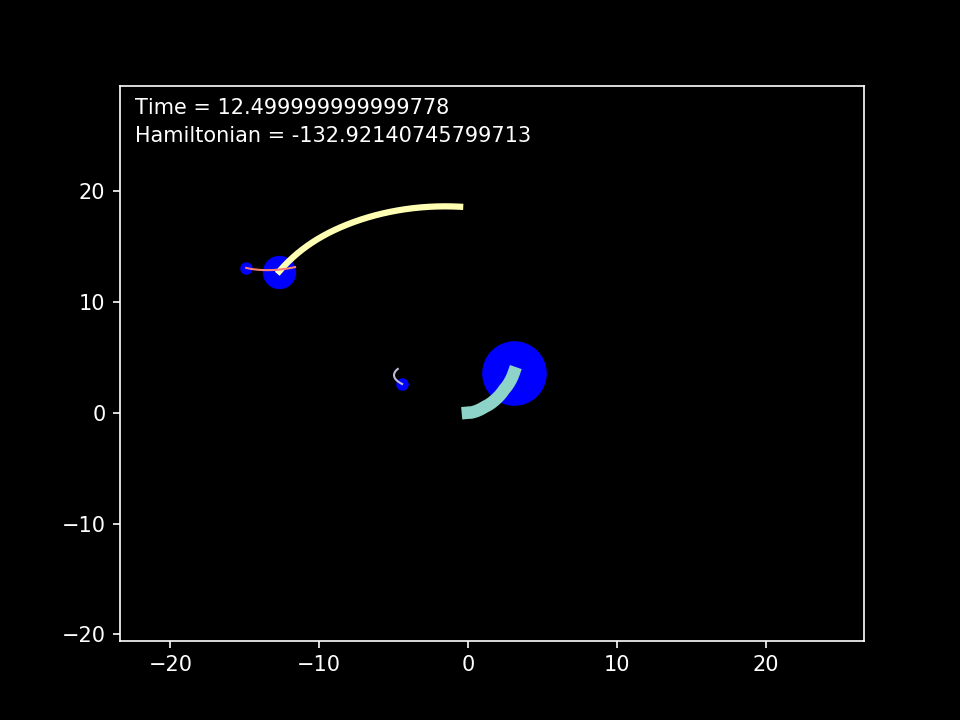

In [9]:
my_Sim_System.speed = 10
my_Sim_System.sim_name = "4_body_orbit_center_of_mass"
my_Sim_System.ShowAnimation(follow_mass = -1, size = 25)

<IPython.core.display.Javascript object>


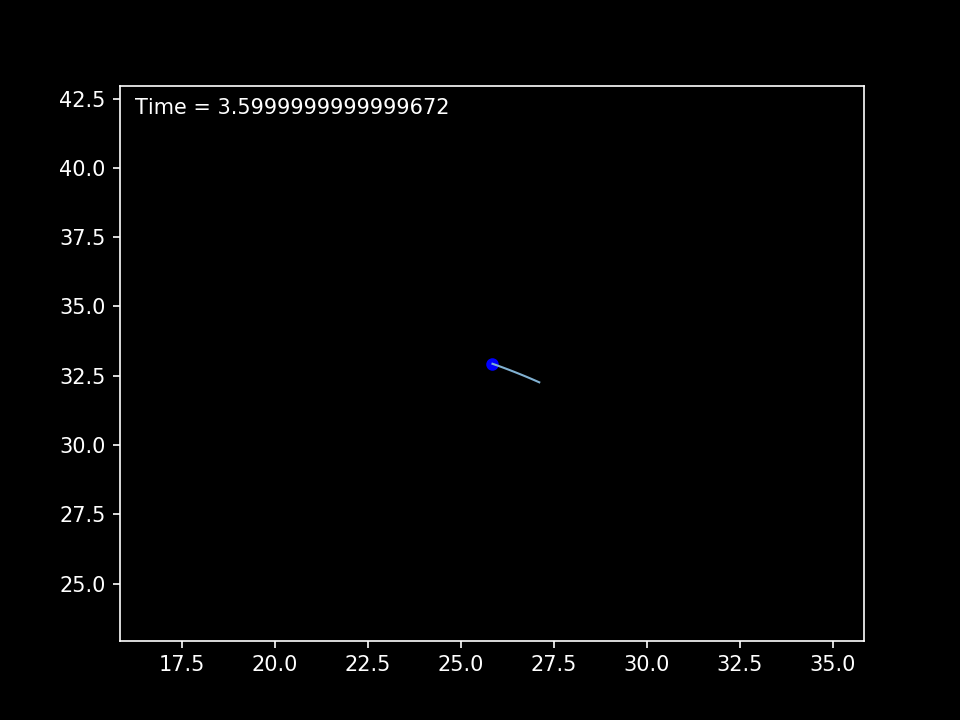

In [4]:
my_Sim_System.speed = 10
my_Sim_System.sim_name = "4_body_orbit_object_5"
my_Sim_System.ShowAnimation(follow_mass = 4, size = 10)

In [17]:
#8 body system
par_Grav_N_Body = partial(Grav_N_Body, G=1, dim = 2)
mass = [5]*8
q_0 = [[-10,10],[0,10],[10,10],[-10,0],[10,0],[-10,-10],[0,-10],[10,-10]]
p_0 = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
trace_len = [200]*8
size = [15]*8
my_Sim_8 = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_8.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8.CalcPath(25)

<IPython.core.display.Javascript object>


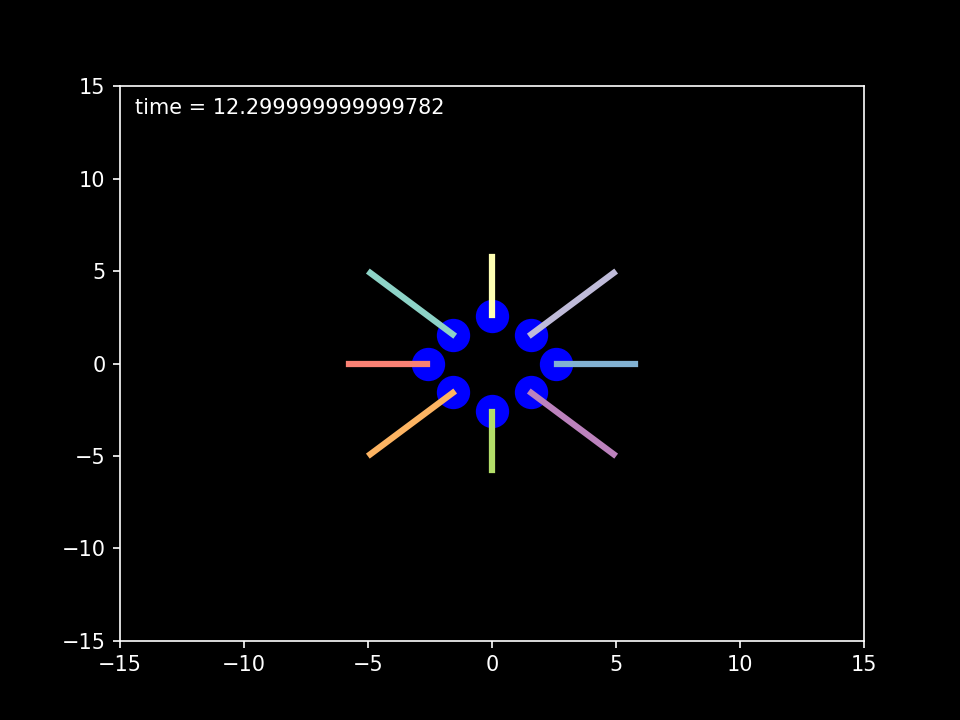

In [19]:
my_Sim_8.ShowAnimation()

In [6]:
#4 body system
par_Grav_N_Body = partial(Grav_N_Body, G= 1, dim=2)
mass = [15]*4
q_0 = [[-10,10],[10,10],[10,-10],[-10,-10]]
p_0 = [[3,3],[3,-3],[-3,-3],[-3,3]]
trace_len = [200]*4
size = [15]*4
my_Sim_4_Orbit = Simulation(Func_Class = par_Grav_N_Body, Calc_Ham = True)
my_Sim_4_Orbit.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_4_Orbit.CalcPath(50) #180

<IPython.core.display.Javascript object>


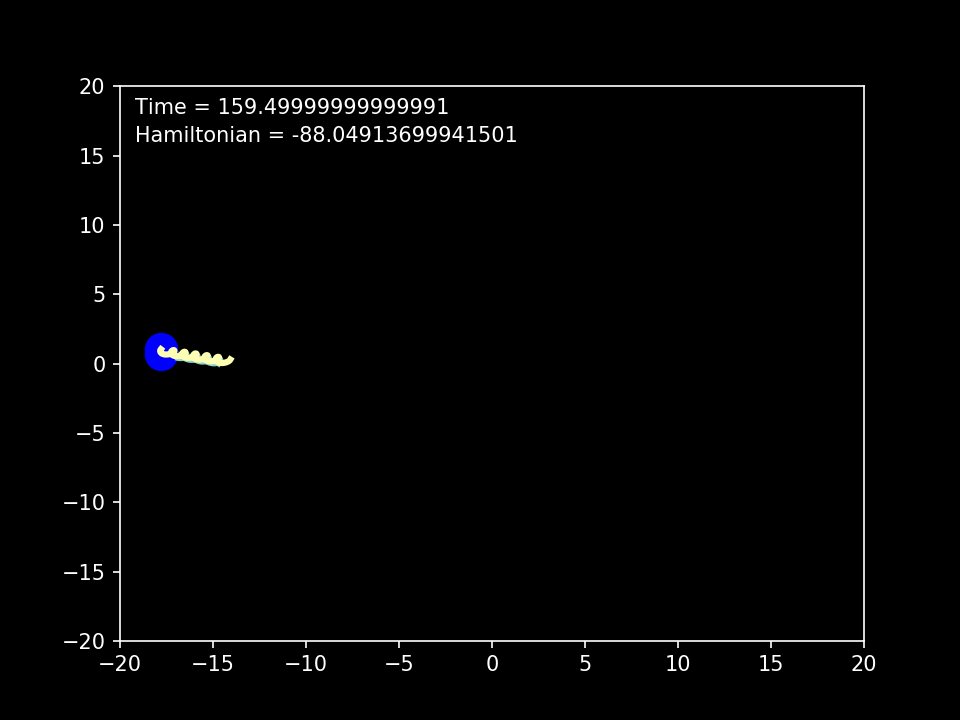

In [7]:
my_Sim_4_Orbit.speed = 30
my_Sim_4_Orbit.sim_name = "4_body_spiral"
my_Sim_4_Orbit.ShowAnimation(size = 20)

In [25]:
#8 body system
par_Grav_N_Body = partial(Grav_N_Body, G= 1, dim=2)

mass = [5]*8
a = 3*(2)**0.5
q_0 = [[-10,10],[0,10],[10,10],[-10,0],[10,0],[-10,-10],[0,-10],[10,-10]]
p_0 = [[3,3],[a,0],[3,-3],[0,a],[0,-a],[-3,3],[-a,0],[-3,-3]]
trace_len = [200]*8
size = [15]*8
my_Sim_8_Spiral = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_8_Spiral.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8_Spiral.CalcPath(100)


#8 body system
mass = [5]*8
a = 3*(2)**0.5
b = 10*(2)**0.5
q_0 = [[-10,10],[0,b],[10,10],[-b,0],[b,0],[-10,-10],[0,-b],[10,-10]]
p_0 = [[3,3],[a,0],[3,-3],[0,a],[0,-a],[-3,3],[-a,0],[-3,-3]]
trace_len = [200]*8
size = [15]*8
my_Sim_8_Spiral2 = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_8_Spiral2.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8_Spiral2.CalcPath(100)

<IPython.core.display.Javascript object>


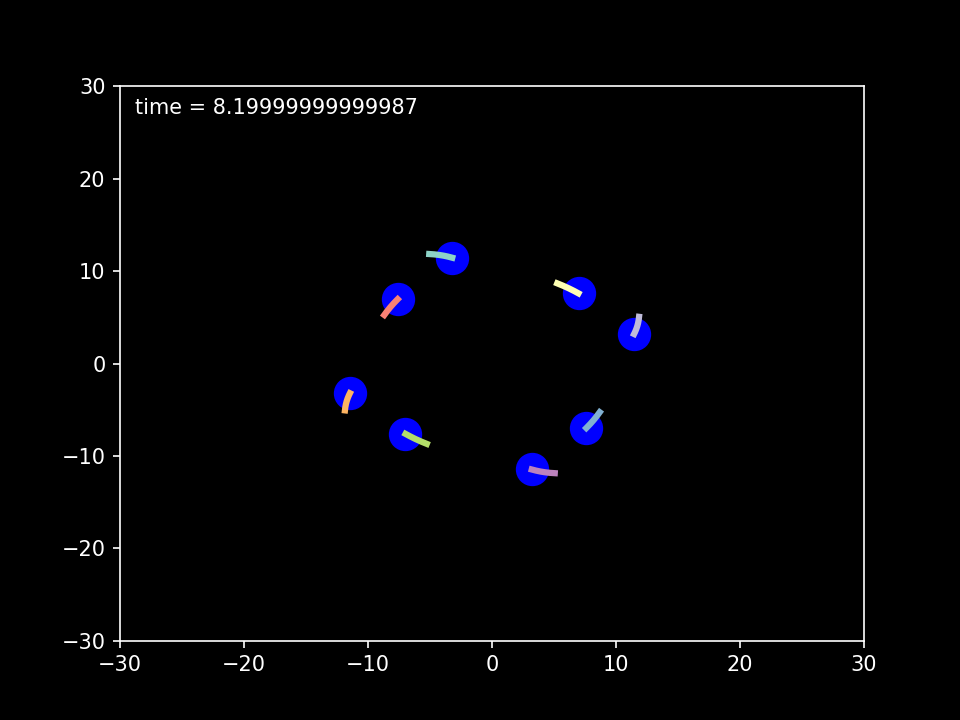

In [26]:
my_Sim_8_Spiral.sim_name = "8_body_spiral"
my_Sim_8_Spiral.ShowAnimation(size = 30)

<IPython.core.display.Javascript object>


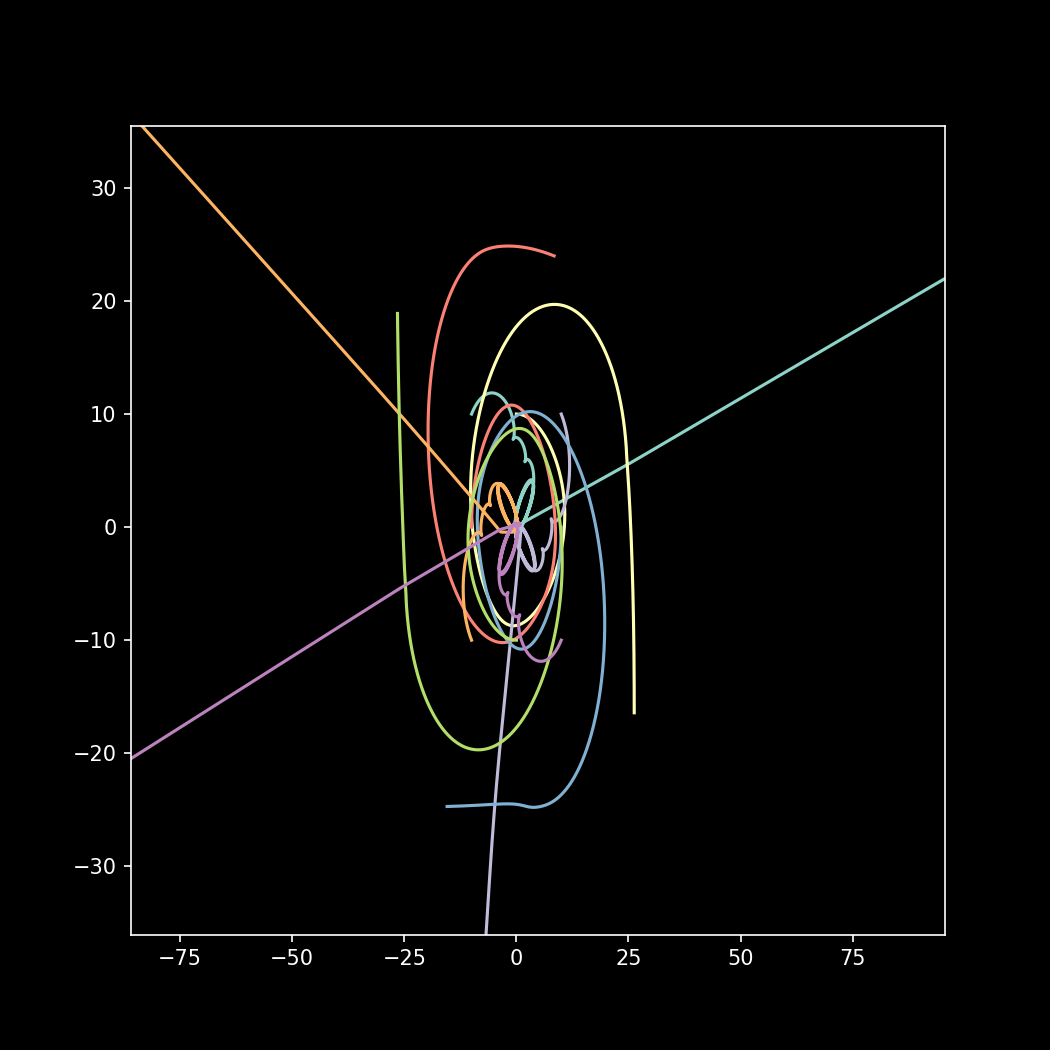

In [27]:
my_Sim_8_Spiral.ShowStatic()

<IPython.core.display.Javascript object>


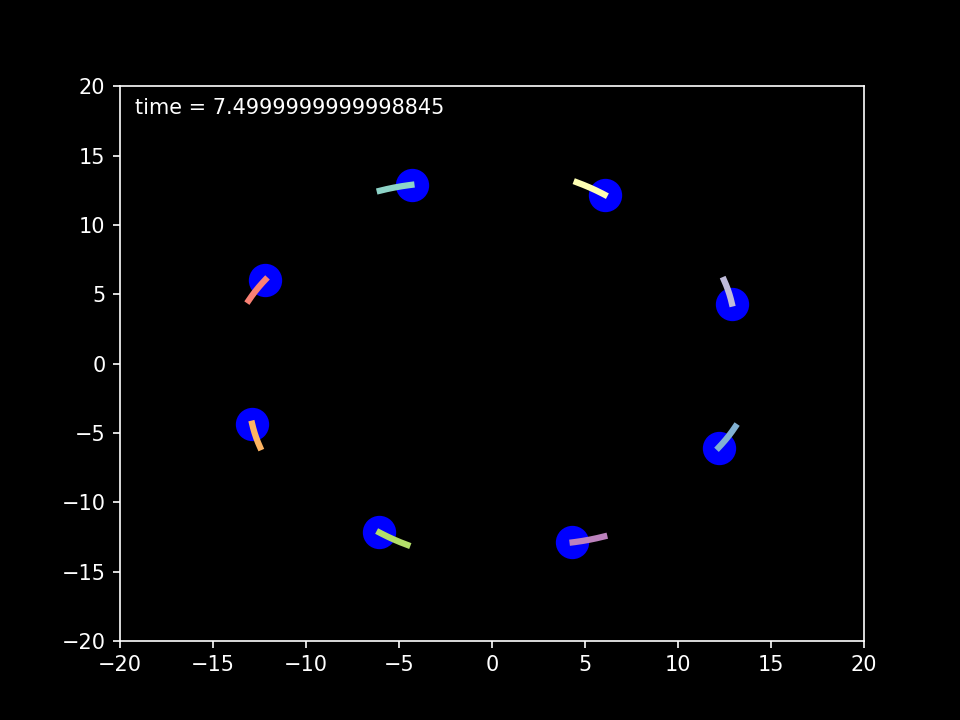

In [28]:
my_Sim_8_Spiral2.sim_name = "8_body_circle"
my_Sim_8_Spiral2.ShowAnimation(size = 20)

<IPython.core.display.Javascript object>


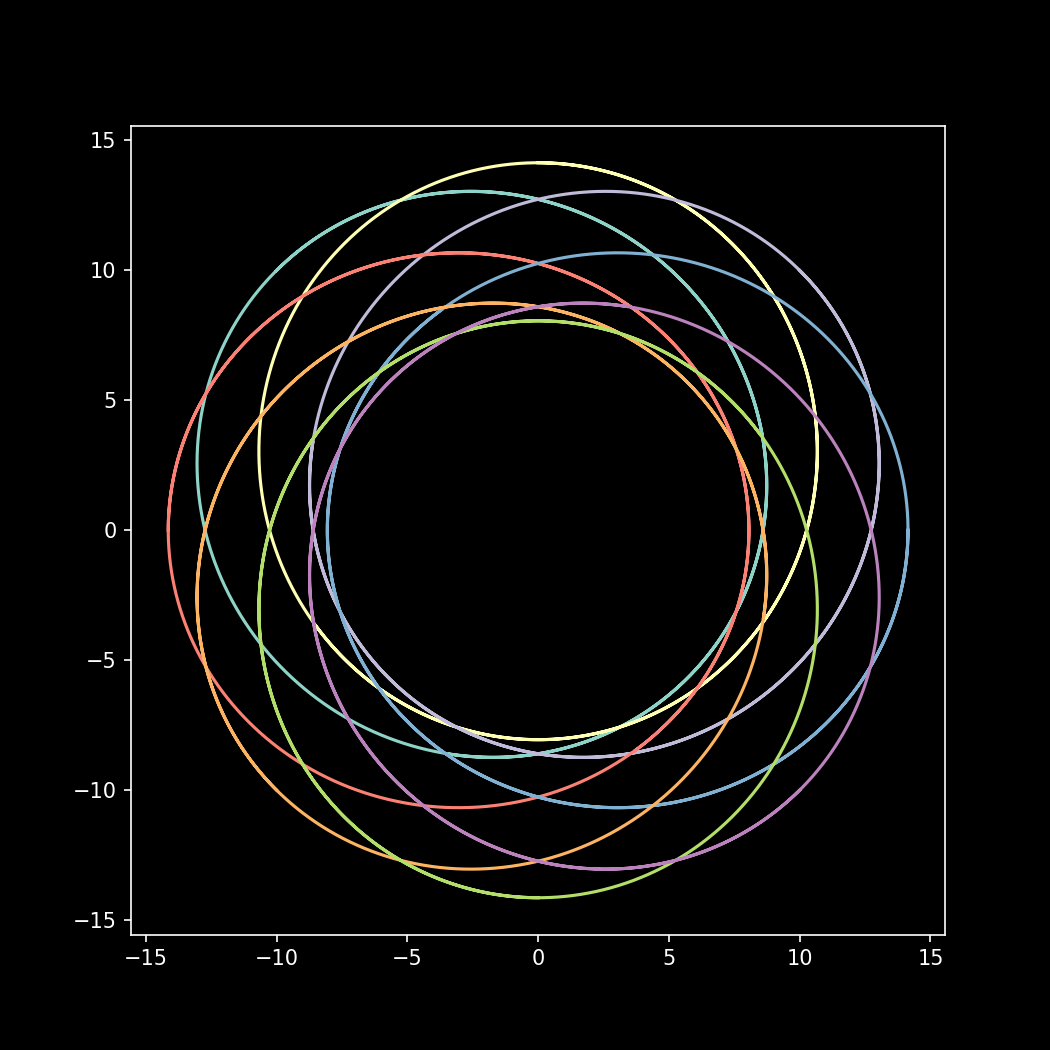

In [29]:
my_Sim_8_Spiral2.ShowStatic()

## Charged Particle n_body problem

We have the Hamiltonian,
> \begin{align*}
H = \sum_{i=1}^n \frac{||p_i||^2}{2m_i}  +  \sum_{(i,j)=(1,1)}^{(n,n)} \zeta_{ij}\frac{kc_ic_j}{||q_i-q_j||}
\end{align*}

Where $k$ is coulomb's constant, with
>$$
\zeta_{ij} =
\begin{cases}
1, i>j\\
0, i\leq j
\end{cases}
$$

This leads to a system of ODE,

> \begin{align*}
\dot{q}_i &= \frac{p_i}{m_i}\\
\dot{p}_i &= \sum_{j\in S_i}\frac{kc_ic_j}{||q_i-q_j||^3}(q_i-q_j)
\end{align*}

Where $S_i = \{1,2,...,n\}/\{i\}$

In [23]:
par_Charge_N_Body = partial(Charge_N_Body, K = 1, dim = 2)
my_Sim_Helium = Simulation(Func_Class = par_Charge_N_Body, Sim_Name="Helium_Sim", Calc_Ham = True)
my_Sim_Helium.speed = 10
a = (70**0.5)/(10)
my_Sim_Helium.AddParts([1000,1, 1], [[0,0],[-100, 0], [2, 0]],
                       [[0,0],[1.323, 0], [0.5, 0]], [500,500, 500], [40,15, 15], [2,-1,-1])
my_Sim_Helium.CalcPath(20)

In [24]:
my_Sim_Helium.CalcHamiltonian()
my_Sim_Helium.Hamiltonian

array([-1.00315784e-02, -1.00315784e-02, -1.00315784e-02, ...,
        2.97300166e+03,  2.97300166e+03,  2.97300166e+03])

<IPython.core.display.Javascript object>


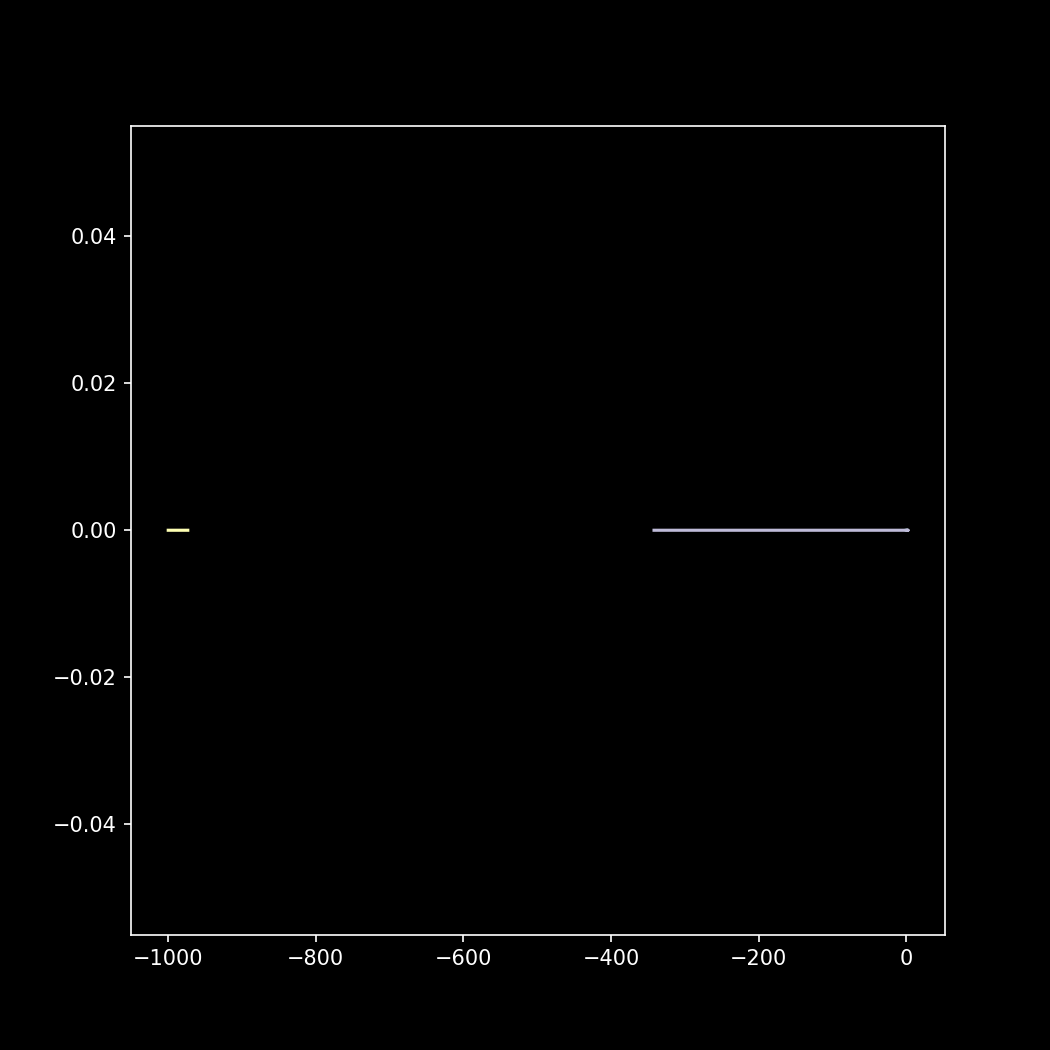

In [16]:
my_Sim_Helium.ShowStatic()

<IPython.core.display.Javascript object>


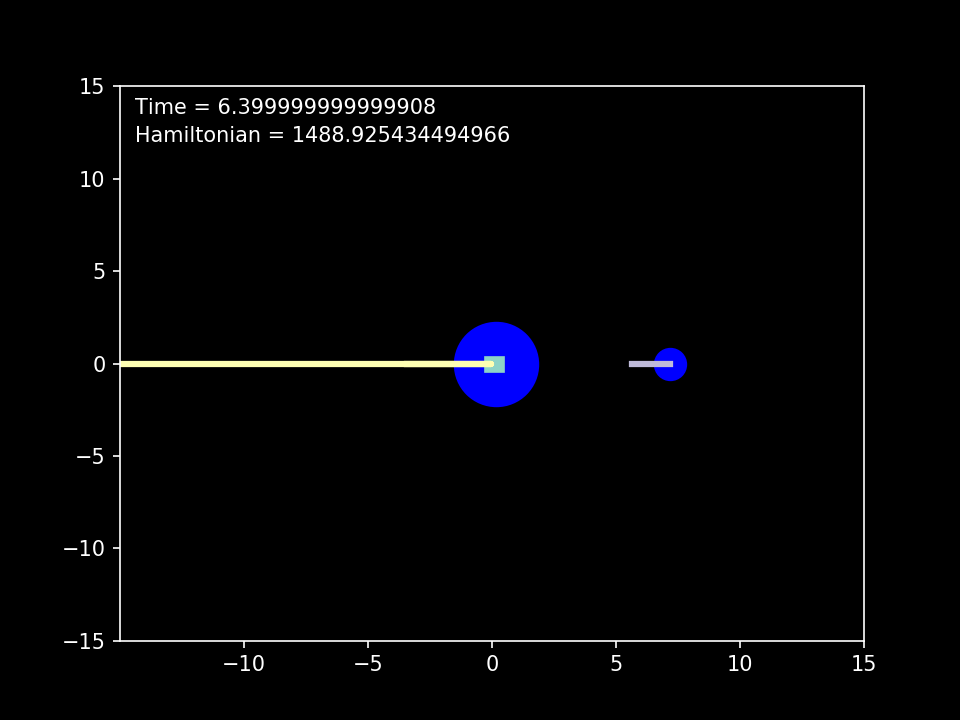

In [84]:
my_Sim_Helium.ShowAnimation()#size = 2)

In [11]:
par_Charge_N_Body = partial(Charge_N_Body, K = 1, dim = 2)
my_Sim_Helium = Simulation(Func_Class = par_Charge_N_Body, Sim_Name="Helium_Sim", Calc_Ham = True)

mass = [100000, 1, 1]
q = np.array([[0,0],[-2,0], [-20, 0]])
p = np.array([[0,0],[0, 0], [0, 0]])
charge = [2,-1,-1]


In [12]:
my_Sim_Helium.speed = 10
my_Sim_Helium.AddParts(mass, q,
                       p, [500, 500,500], [30,15, 15], charge)
my_Sim_Helium.CalcPath(35)

<IPython.core.display.Javascript object>


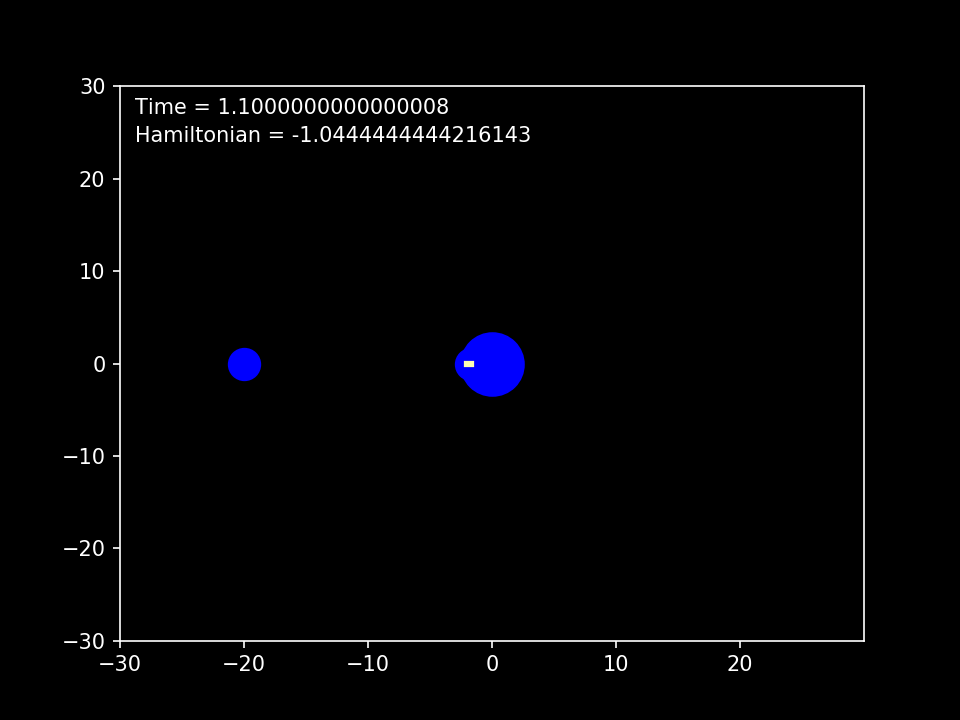

In [13]:
my_Sim_Helium.ShowAnimation(size = 30)

In [9]:
par_Double_Pendulum = partial(Double_Pendulum, g=9.81, rod_length = [0.5,1])
Double_Pen = Simulation(Func_Class=par_Double_Pendulum, Sim_Name="Double_Pen", Calc_Ham = True)
mass = [1, 1]
q = np.array([[0], [np.pi/2]])
p = np.array([[0],[7]])

Double_Pen.dim = 1

In [10]:
Double_Pen.speed = 4
Double_Pen.AddParts(mass, q,
                       p, [30, 30], [15, 15])
Double_Pen.CalcPath(35)

<IPython.core.display.Javascript object>


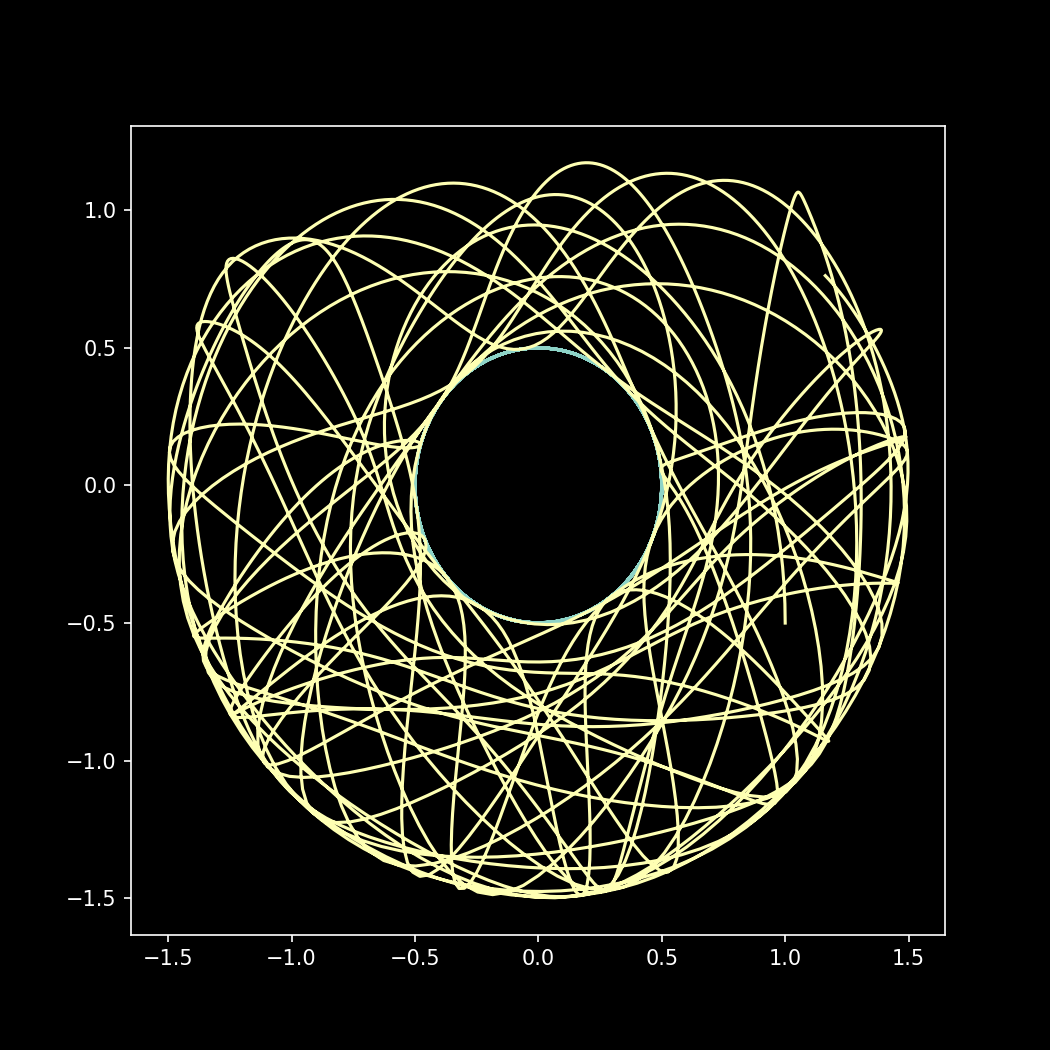

In [11]:
Double_Pen.ShowStatic()

<IPython.core.display.Javascript object>


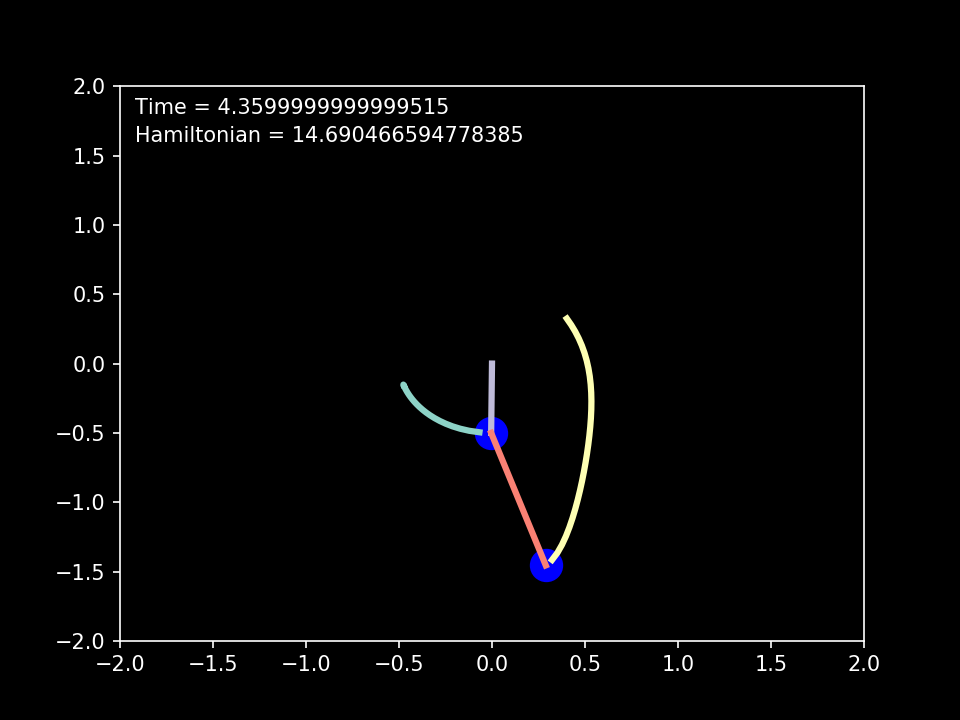

In [12]:
Double_Pen.ShowAnimation(size = 2, follow_mass = -3, link_data = [[0,1],[1,2]])

In [13]:
Double_Pen.ShowAnimation3D(size = 2)

In [14]:
sc_Spring_Pen = partial(Spring_Pen,spring_const = 40, g=9.81, length=1)
Spring_Pen_Sim = Simulation(Func_Class=sc_Spring_Pen,Sim_Name="Spring_Pen", Calc_Ham = True)

mass = [1]
q = np.array([[0, 3*np.pi/4]])
p = np.array([[0,0]])

Spring_Pen_Sim.dim = 2

In [15]:
Spring_Pen_Sim.speed = 2
Spring_Pen_Sim.AddParts(mass, q,
                       p, [40], [15])
Spring_Pen_Sim.CalcPath(40)

<IPython.core.display.Javascript object>


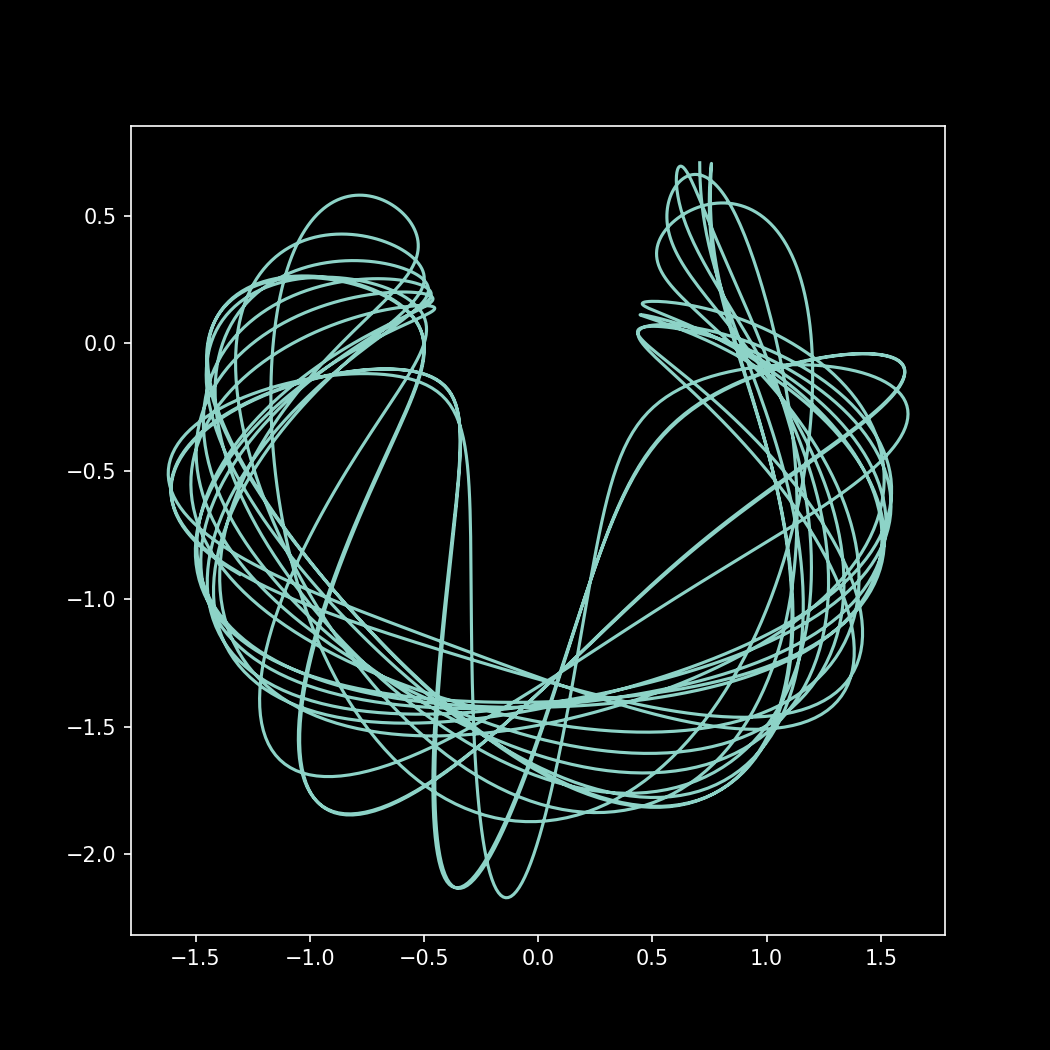

In [16]:
Spring_Pen_Sim.ShowStatic()

<IPython.core.display.Javascript object>


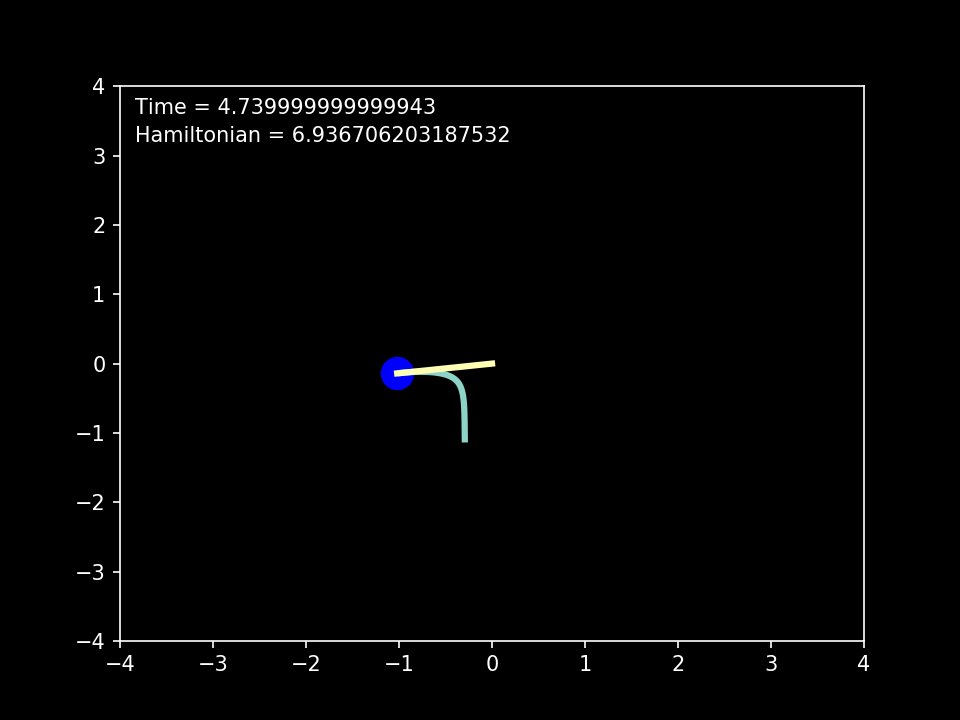

In [17]:
Spring_Pen_Sim.ShowAnimation(size = 4, follow_mass = -3, link_data=[[0,1]])

In [3]:
sc_cone_motion = partial(Motion_In_Cone, g=9.81, alpha=np.pi/4)
Cone_Motion_Sim = Simulation(Func_Class=sc_cone_motion,Sim_Name="Motion_Of_Cone", Calc_Ham = True)

mass = [2]
q = np.array([[3, 0]])#1.5
p = np.array([[0,3]]) #11.508 # then circular orbit

Cone_Motion_Sim.dim = 2


In [4]:
Cone_Motion_Sim.speed = 3
Cone_Motion_Sim.AddParts(mass, q,
                       p, [250], [15])
Cone_Motion_Sim.CalcPath(40)

<IPython.core.display.Javascript object>


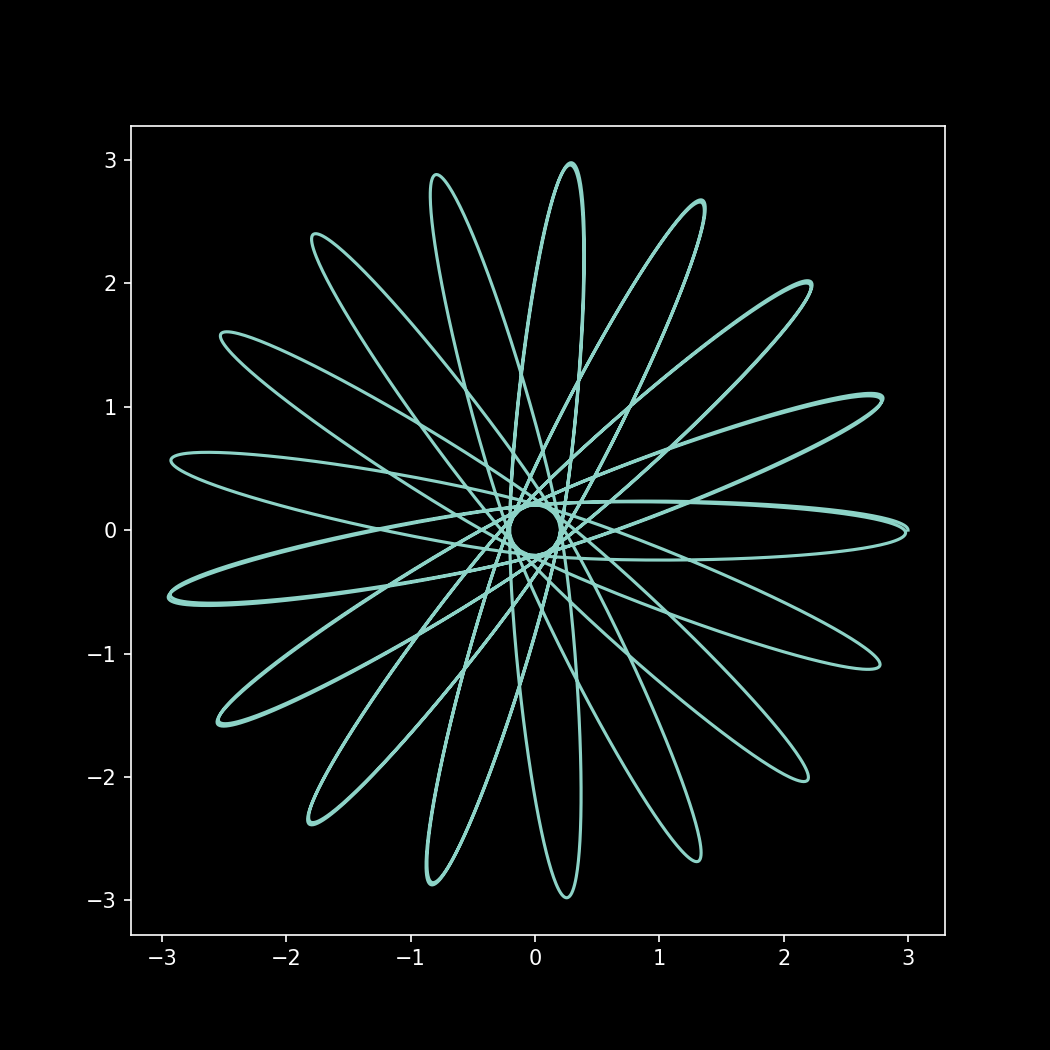

In [5]:
Cone_Motion_Sim.ShowStatic(with_color = False, z_axis = [0,3], save = False)

<IPython.core.display.Javascript object>


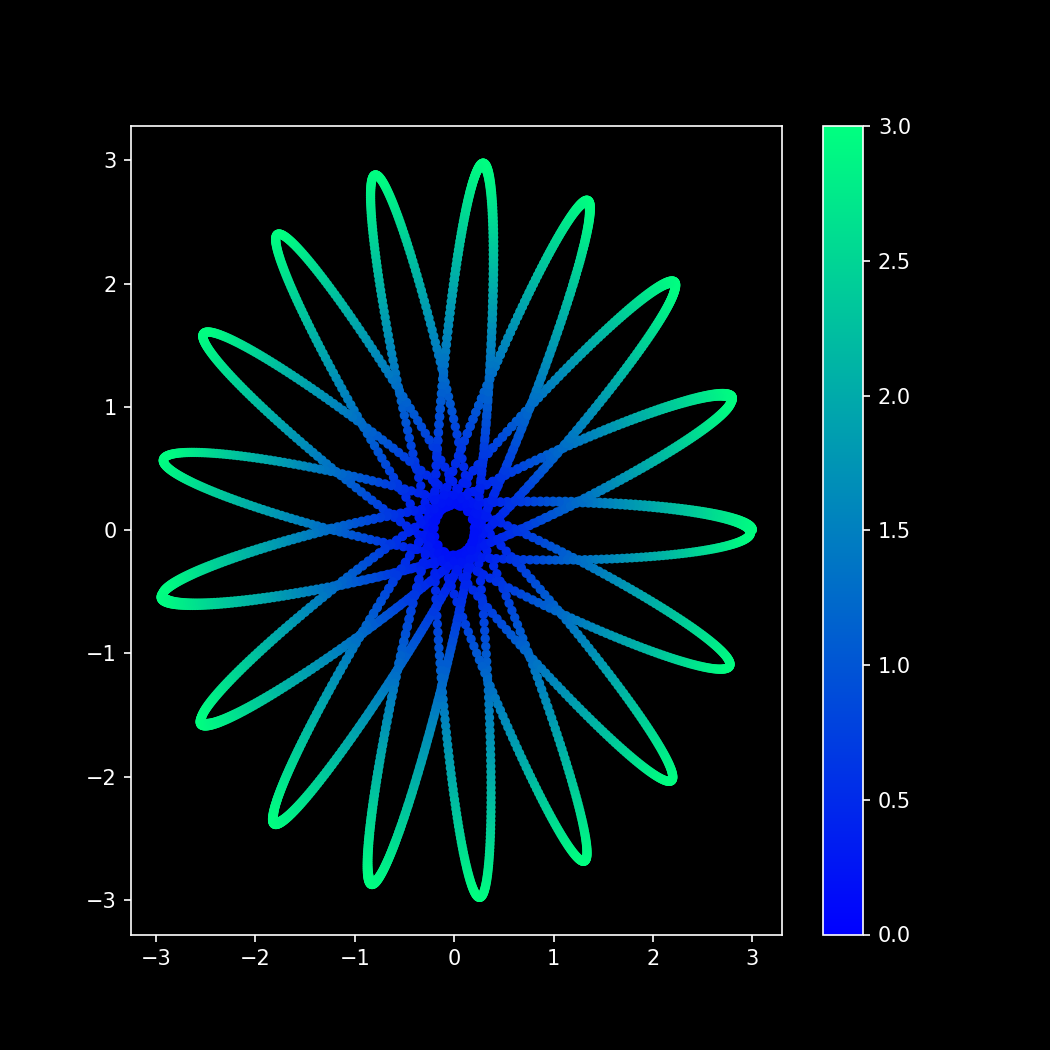

In [6]:
Cone_Motion_Sim.ShowStatic(with_color = True, z_axis = [0,3], save = False)

<IPython.core.display.Javascript object>


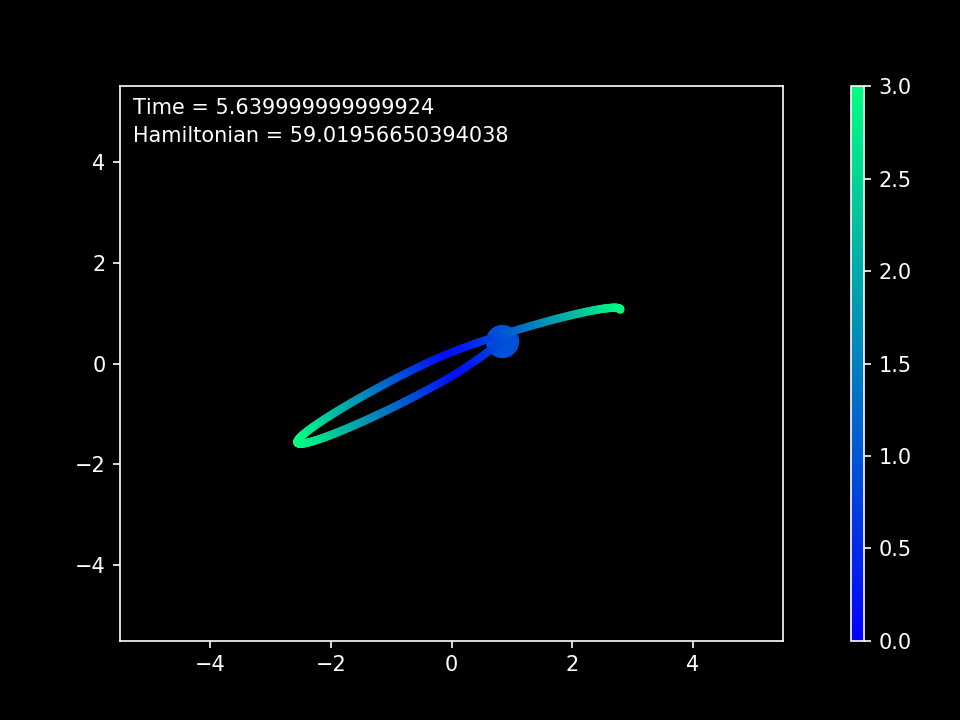

In [8]:
Cone_Motion_Sim.ShowAnimation(size = 5.5, follow_mass = -3, with_color = True, z_axis=[0,3], max_dots = 800, save = False)

In [15]:
Cone_Motion_Sim.ShowAnimation3D(size = 5)

# 3D animation

## Gravity n-body

In [16]:
#4 body system
mass = [15]*3
q_0 = [[-10,10],[10,10],[10,-10]]
p_0 = [[3,3],[3,-3],[-3,-3]]
trace_len = [200]*3
size = [15]*3
par_Grav_N_Body = partial(Grav_N_Body, G = 1, dim =2)
my_Sim_2D = Simulation(par_Grav_N_Body)
my_Sim_2D.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_2D.CalcPath(100)

In [17]:
my_Sim_2D.ShowAnimation3D()

In [58]:
#my_Sim_4_Orbit.speed = 30
#my_Sim_4_Orbit.sim_name = "4_body_spiral"
#my_Sim_4_Orbit.ShowAnimation(size = 20)

In [18]:
#using class that got created
mass = [15]*3
q_0 = [[-10,10,10],[10,10,0],[10,-10,-10]]
p_0 = [[3,3,3],[3,-3,-3],[-3,-3,-3]]
trace_len = [200]*3
size = [15]*3
par_Grav_N_Body = partial(Grav_N_Body, G = 1, dim =3)
my_Sim_3D = Simulation(Func_Class = par_Grav_N_Body)
my_Sim_3D.dim = 3
my_Sim_3D.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_3D.CalcPath(100)

<IPython.core.display.Javascript object>


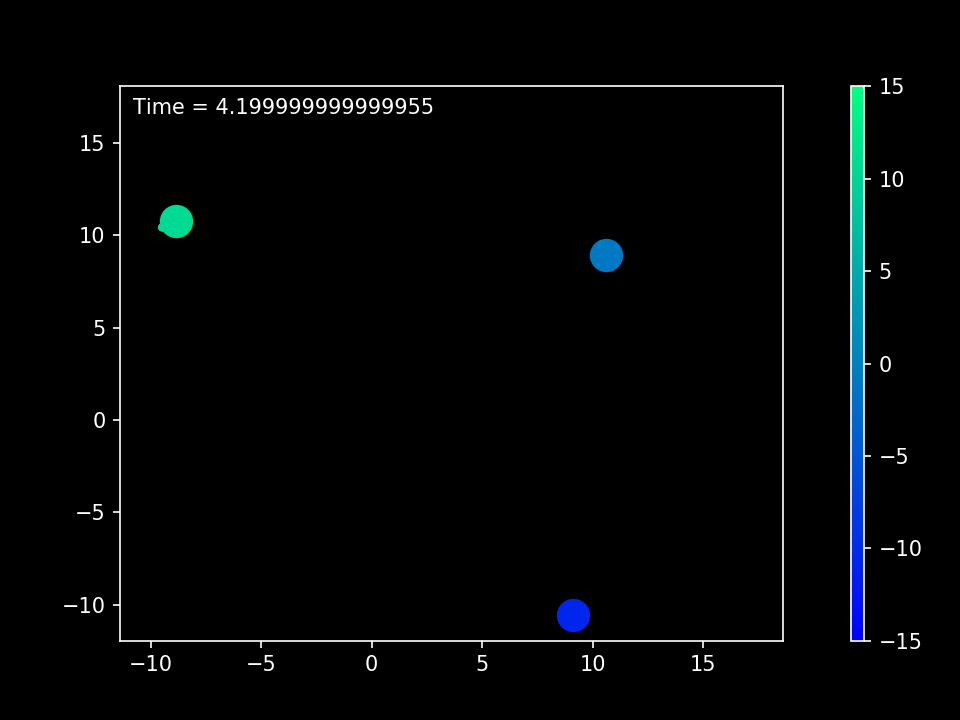

In [23]:
my_Sim_3D.ShowAnimation(z_axis=[-15, 15], with_color=True)

In [19]:
my_Sim_3D.ShowAnimation3D()

## Charged n-body

In [11]:
par_Charge_N_Body = partial(Charge_N_Body, K= 1, dim=3)
my_Sim_Helium_3D = Simulation(Func_Class = par_Charge_N_Body,Sim_Name="Helium_Sim")
my_Sim_Helium_3D.speed = 15
my_Sim_Helium_3D.dim = 3
my_Sim_Helium_3D.AddParts([1000,1, 1], [[0,0,0],[-7, 0,0], [7, 0,0]],
                       [[0,0,0],[0, 0,0.5], [0, -0.5,0]], [500,500, 500], [40,15, 15], [2,-1,-1])
my_Sim_Helium_3D.CalcPath(40)

In [12]:

my_Sim_Helium_3D.ShowAnimation3D()

In [56]:
ipv.movie('wave.gif', frames = 100, fps = 15)

Output()

In [2]:
q = [[np.pi/4,np.pi,0]]
p = [[0,0.1,-(2**0.5*(4*2-1))**0.5]]

Two_Electrons_Near_TCP(0).calc_H_bar(*q[0][0:2], *p[0])

0.020000000000000462

In [5]:
par_Two_Electrons_Near_TCP = partial(Two_Electrons_Near_TCP, is_eze = False)
my_Sim_Helium = Simulation(Func_Class = par_Two_Electrons_Near_TCP,Sim_Name="Helium_Sim")

my_Sim_Helium.speed = 9
my_Sim_Helium.dim = 3
my_Sim_Helium.AddParts([1000], q, p, Track_Length = [2000])
my_Sim_Helium.CalcPath(20)

<IPython.core.display.Javascript object>


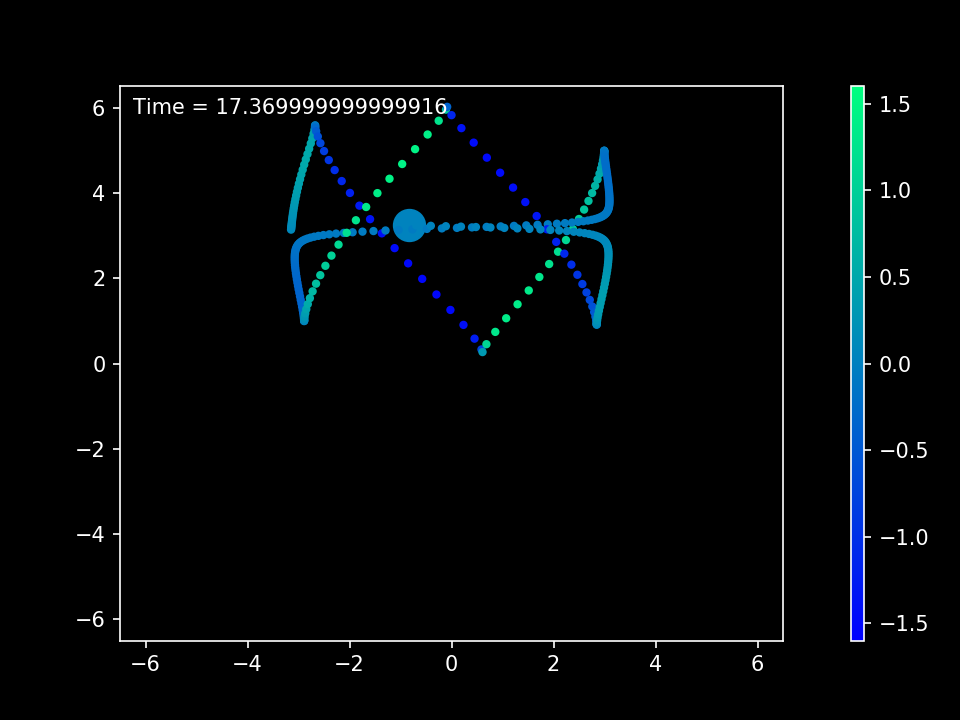

In [6]:
my_Sim_Helium.ShowAnimation(size = 6.5, with_color=True, z_axis = [-1.6,1.6], follow_mass=-3, max_dots= 300)

<IPython.core.display.Javascript object>


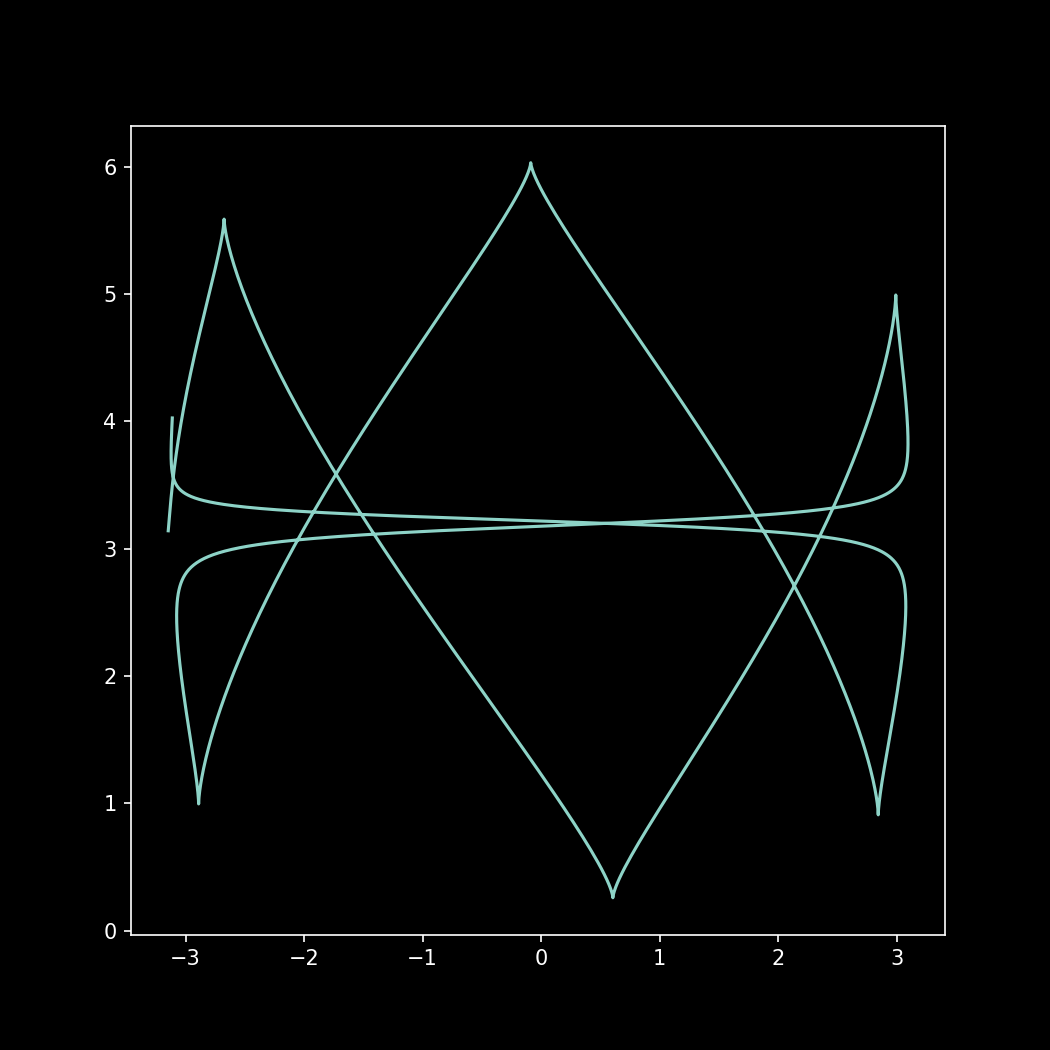

In [7]:
my_Sim_Helium.ShowStatic()

In [13]:
q = [[np.pi/4+0000.1,np.pi,0]]
p = [[0,0,-(2**0.5*(4*2-1))**0.5]]

Two_Electrons_Near_TCP(0).calc_H_bar(*q[0][0:2], *p[0])

-0.08266805693407164

In [14]:
my_Sim_Helium = Simulation(Func_Class = Two_Electrons_Near_TCP,Sim_Name="Helium_Sim")

my_Sim_Helium.speed = 9
my_Sim_Helium.dim = 3
my_Sim_Helium.AddParts([1000], q, p, Track_Length = [2000])
my_Sim_Helium.CalcPath(20)

C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:128: RuntimeWarning: overflow encountered in double_scalars
  dot_q[0][2] = pR*H_bar
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:152: RuntimeWarning: overflow encountered in double_scalars
  H_bar = (1/2)*(pR**2+pa**2+(pO**2)/(np.cos(a)**2*np.sin(a)**2)) + self.V(a,O)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:131: RuntimeWarning: overflow encountered in double_scalars
  temp = (pO**2)*((np.cos(a)**2 - np.sin(a)**2)/(np.sin(a)**3*np.cos(a)**3))
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:132: RuntimeWarning: overflow encountered in double_scalars
  dot_p[0][0] = -(1/2)*pR*pa + temp - self.par_alpha_V(a, O)
C:\Users\Mark\OneDrive - University of Bristol\Student_Internship_2020\Helium_Atom\n_body_equations.py:13

<IPython.core.display.Javascript object>


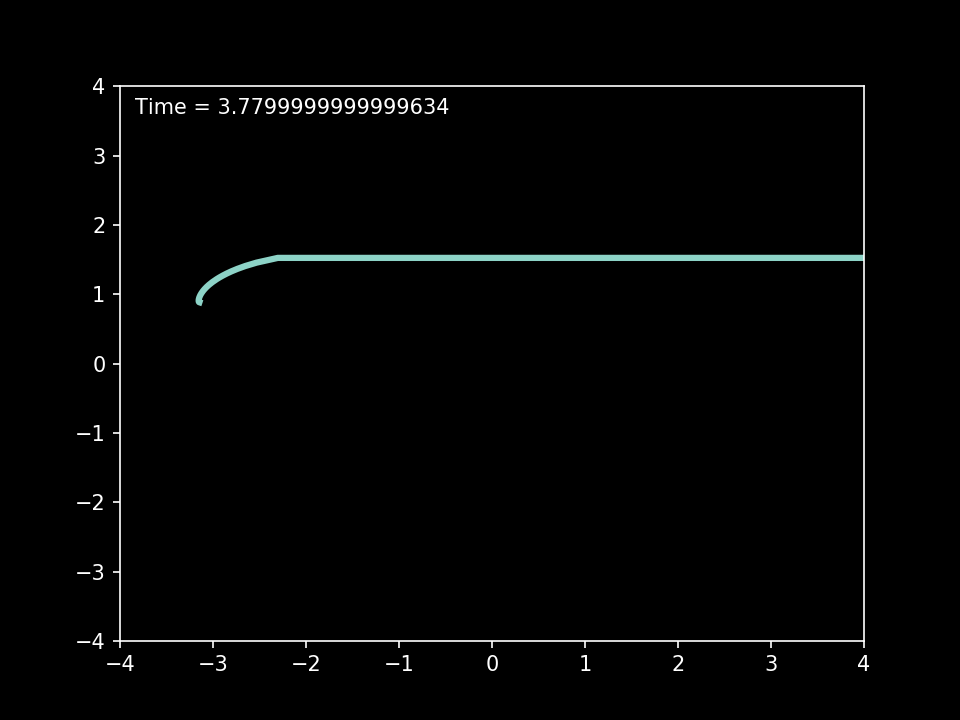

In [17]:
my_Sim_Helium.ShowAnimation(size = 4, with_color=False, z_axis = [-1.6,1.6], follow_mass=-3, max_dots= 300)

In [ ]:
# as can be seen when alpha is pi/2 a binary colision occurs and this set of equations can't deal with it.

In [2]:
Q = [[0,-1,1,0]]
P = [[10**0.5, 0,0, 10**0.5]]
'''E = -1
x_1 = -1, y_1 = 0
x_2 = 1, y_2 = 0
p_x_1 = p_x_2 = 0
p_y_1 = p_y_2 = sqrt(10)/2'''

'E = -1\nx_1 = -1, y_1 = 0\nx_2 = 1, y_2 = 0\np_x_1 = p_x_2 = 0\np_y_1 = p_y_2 = sqrt(10)/2'

In [5]:
q = [[-3.375,0],[3.375,0]]
p = [[0.27217,0],[0,0]]
Q = [[0., 1.83711731, 1.83711731, 0.]]
Q_bar = [[0, 0.84089642, 0.84089642, 0]]
P = [[ 0., -1.00001643,  0. ,  0.  ]]

In [2]:
a = (70**0.5)/(10)
q = [[-5,0],[5,0]]
p = [[a,0],[-a,0]]
Q = [[0., 2.23606798, 2.23606798, 0.]]
Q_bar = [[0, 0.84089642, 0.84089642, 0]]
P = [[ 0., -3.74165739,  -3.74165739 ,  0.  ]]

In [7]:
q = [[-5,0],[5,0]]
p = [[1,0],[-0.632,0]]
Q = [[0., 2.23606798, 2.23606798, 0.]]
P = [[ 0., -4.47213595, -2.82638992 ,  0.  ]]
Q_bar = [[0, 0.84089642, 0.84089642, 0]]

In [4]:
q = [[0,-5],[0,5]]
p = [[0,0.5],[0,1.072]]
Q = [[-1.58113883, 1.58113883, 1.58113883, 1.58113883]]
P = [[1.58113883, -1.58113883, 3.38996165, 3.38996165]]
Q_bar = [[-0.59460356, 0.59460356, 0.59460356, 0.59460356]]

In [19]:
q = [[100,0],[0.001,0]]
p = [[0,0],[0,0]]
Q = [[10, 0, 0.03162278, 0.]]
P = [[ 0., 0,  0 ,  0.  ]]
Q_bar = [[1, 0, 0.00316228, 0]]

In [98]:
#r1 comming in from long way away
q = [[-100,0],[2,0]]
p = [[1.323,0],[-0.5,0]]
Q,P,Q_bar = Two_Electron_Non_Singular(0).cart_to_QP(q,p)
Q = [Q]
P = [P]
Q_bar = [Q_bar]

In [95]:
q = [[-100,0],[2,0]]
p = [[2**0.5,0],[0,0]]
Q,P,Q_bar = Two_Electron_Non_Singular(0).cart_to_QP(q,p)
Q = [Q]
P = [P]
Q_bar = [Q_bar]

In [99]:
Two_Electron_Non_Singular(0).cart_to_QP(q,p)

(array([ 0.        , 10.        ,  1.41421356,  0.        ]),
 array([  0.        , -26.46      ,  -1.41421356,   0.        ]),
 array([0.        , 0.99990002, 0.14140722, 0.        ]))

In [109]:
par_Two_Electrons_Near_Non_Singular = partial(Two_Electron_Non_Singular, E = 0)
my_Sim_Helium = Simulation(Func_Class = par_Two_Electrons_Near_Non_Singular,Sim_Name="Helium_Sim_eZe", time_step = 0.01)

my_Sim_Helium.speed = 15
my_Sim_Helium.dim = 3
my_Sim_Helium.AddParts([1000], Q_bar, P, Track_Length = [750])
my_Sim_Helium.CalcPath(25)

<IPython.core.display.Javascript object>


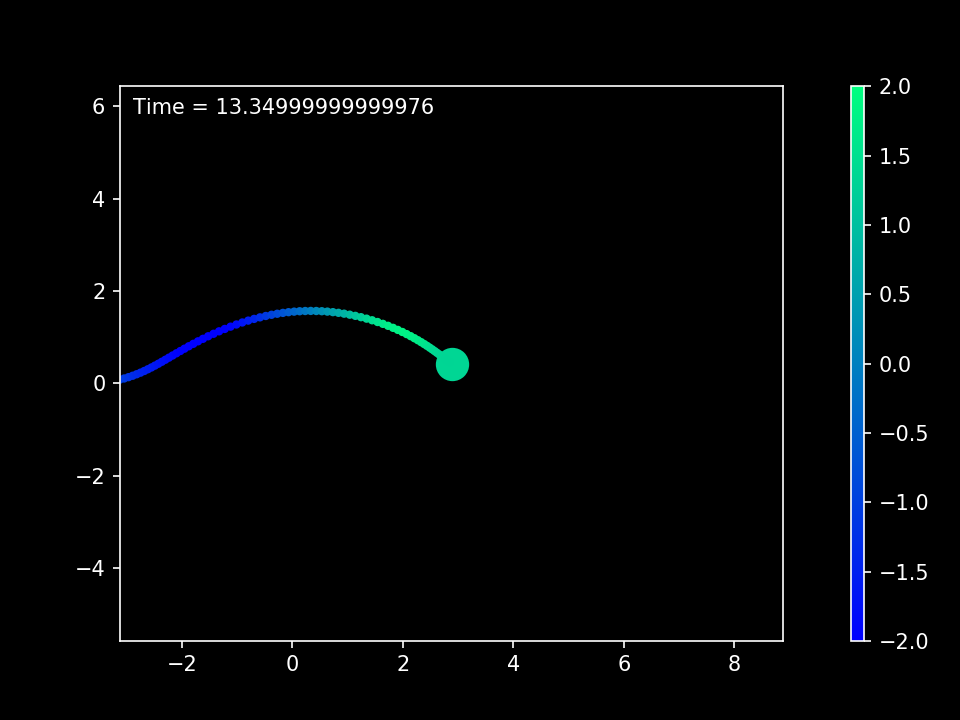

In [110]:
my_Sim_Helium.ShowAnimation(size = 6, follow_mass = -1, with_color = True, z_axis = [-2,2], save = False)
#my_Sim_Helium.ShowAnimation3D()

<IPython.core.display.Javascript object>


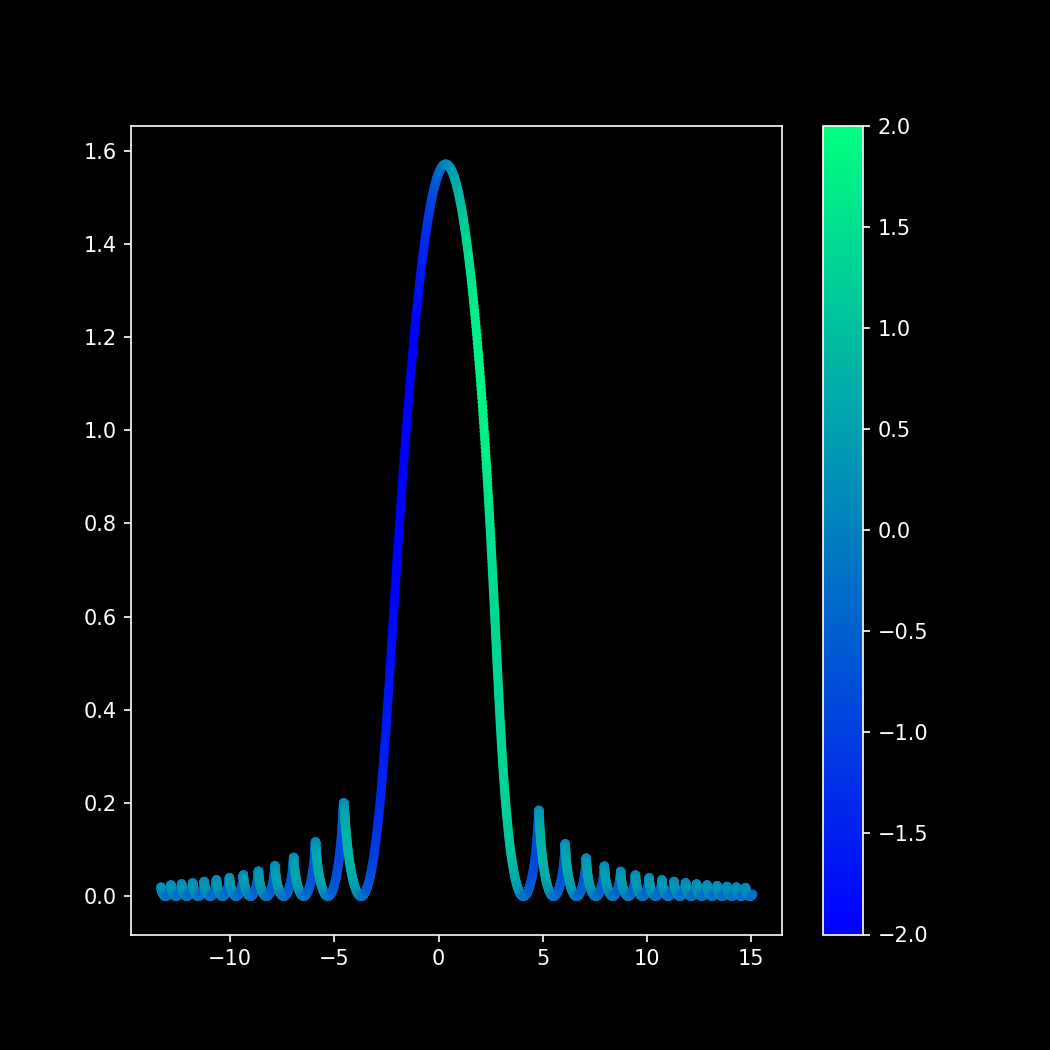

In [111]:
my_Sim_Helium.ShowStatic(with_color = True, z_axis = [-2,2], save = False)

In [ ]:
#alpha = pi/2, means the 2nd particle has left
#alpha = 0, means the 1st particle has left